# EDA

In [2]:
##Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("data1.csv",parse_dates = True)
data.head()

,DATE_KEY,OFFRNG_ID,GEO_ID,NO_OF_OPRTNTY_CREATD,NO_OF_WINS,DATE
0,42901,194,15,1,1,2017-06-15
1,42901,194,46,1,0,2017-06-15
2,42901,194,224,0,1,2017-06-15
3,42901,194,46,1,0,2017-06-15
4,42901,194,224,0,1,2017-06-15


In [3]:
##shape of the dataset
print("The shape of the dataset is {}".format(data.shape))

The shape of the dataset is (200000, 6)


In [4]:
##renaming the columns
data.columns = [x.lower() for x in data.columns]

In [5]:
##Inspecting date_key and DATE
len(data['date_key'].value_counts()) == len(data['date'].value_counts())

True

In [6]:
##no of offers
len(pd.unique(data['offrng_id']))

67

In [7]:
##no of locations where offers were given
len(pd.unique(data['geo_id']))

190

In [8]:
##making date as the index
data.index = pd.to_datetime(data.date)

In [9]:
data.head()

,date_key,offrng_id,geo_id,no_of_oprtnty_creatd,no_of_wins,date
date,,,,,,
2017-06-15,42901,194,15,1,1,2017-06-15
2017-06-15,42901,194,46,1,0,2017-06-15
2017-06-15,42901,194,224,0,1,2017-06-15
2017-06-15,42901,194,46,1,0,2017-06-15
2017-06-15,42901,194,224,0,1,2017-06-15


In [10]:
##no unique time stamps:-
len(pd.unique(data.index))

##Thus duplicate indexes..

677

In [11]:
##anlaysis on the basis of the indexes..
gp_mean = data.groupby(level = 0).mean()
gp_count = data.groupby(level = 0).count()
gp_sum = data.groupby(level = 0).sum()

In [12]:
##Plotting the distribution:--
import seaborn as sns
sns.set(color_codes = True)
'''
The important features are 
1) gp_sum['no_of_oprtnty_created']   --->total no of oppurtinuty created during that timestamp.
2) gp_sum['no_of_wins']              --->total no of wins during that time stamp.

3)gp_mean['no_pf_oprtnty_created']
4)gp_mean['no_of_wins']

5)gp_count['date']                   --->active dates for the offers  or no of offers.

'''

"\nThe important features are \n1) gp_sum['no_of_oprtnty_created']   --->total no of oppurtinuty created during that timestamp.\n2) gp_sum['no_of_wins']              --->total no of wins during that time stamp.\n\n3)gp_mean['no_pf_oprtnty_created']\n4)gp_mean['no_of_wins']\n\n5)gp_count['date']                   --->active dates for the offers  or no of offers.\n\n"

Text(0.5, 1.0, 'PLOT')

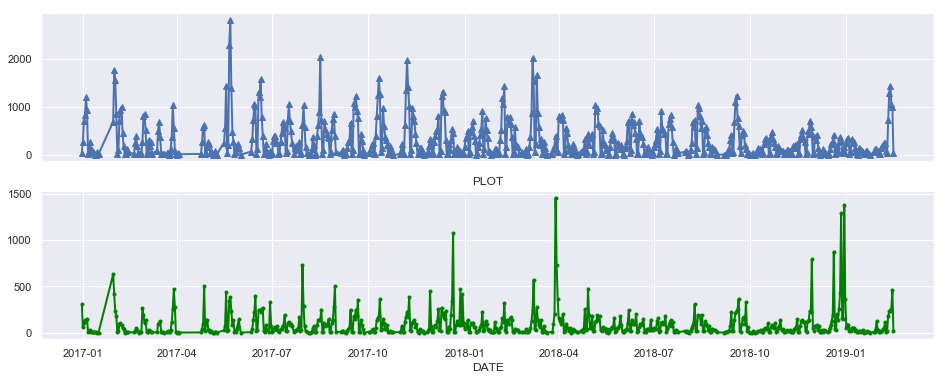

In [13]:
##plot sum vs DATE
fig,axes = plt.subplots(nrows = 2,ncols = 1,sharex = True,sharey = False,figsize = (16,6))
axes[0].plot(gp_sum.index,gp_sum['no_of_oprtnty_creatd'],marker = '^',linewidth = 2,label = 'no_of_oprtnty_created')
axes[1].plot(gp_sum.index,gp_sum['no_of_wins'],marker = '.',linewidth = 2,label = 'no_of_wins',color = 'green')
plt.xlabel("DATE")
plt.title("PLOT")

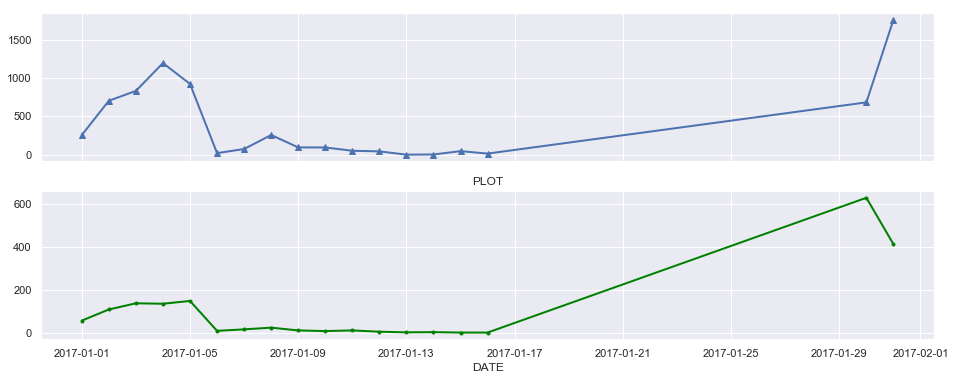

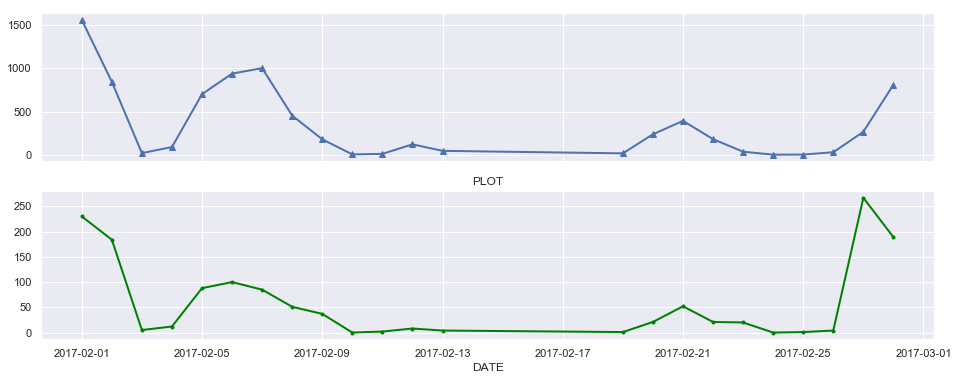

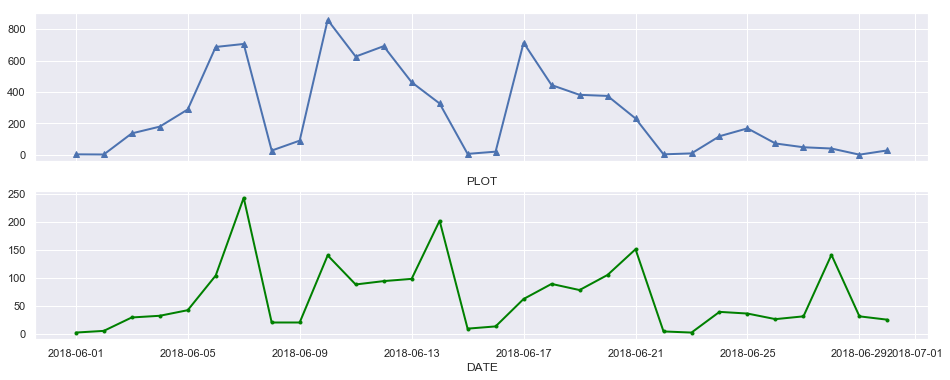

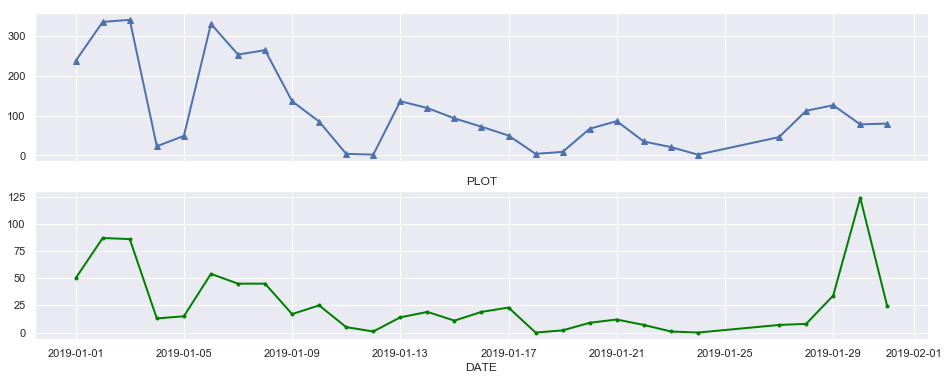

In [14]:
##Lets zoom in 
for index_date in ['2017-01','2017-02','2018-06','2019-01']:
    sub_date = gp_sum[index_date]
    fig,axes = plt.subplots(nrows = 2,ncols = 1,sharex = True,sharey = False,figsize = (16,6))
    axes[0].plot(sub_date.index,sub_date['no_of_oprtnty_creatd'],marker = '^',linewidth = 2,label = 'no_of_oprtnty_created')
    axes[1].plot(sub_date.index,sub_date['no_of_wins'],marker = '.',linewidth = 2,label = 'no_of_wins',color = 'green')
    plt.xlabel("DATE")
    plt.title("PLOT")

In [15]:
##One thing we can say that at the begenning of month subscription increases and at month end less subscriptions
##happens

##from the graph it is clear that no of wins is some what dependent to no of oppertunity created.

Text(0.5, 1.0, 'PLOT')

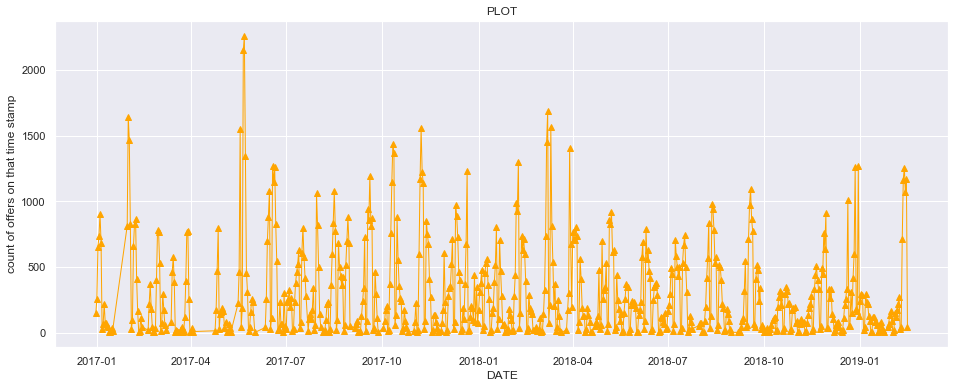

In [16]:
##inspecting no of offers.
plt.figure(figsize = (16,6))
plt.plot(gp_count.index,gp_count['date'],marker = '^',linewidth = 1,color = 'orange',label = 'no of offers')
plt.xlabel("DATE")
plt.ylabel("count of offers on that time stamp")
plt.title("PLOT")

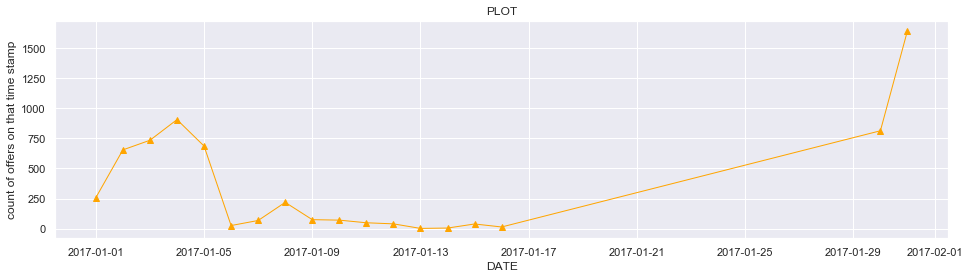

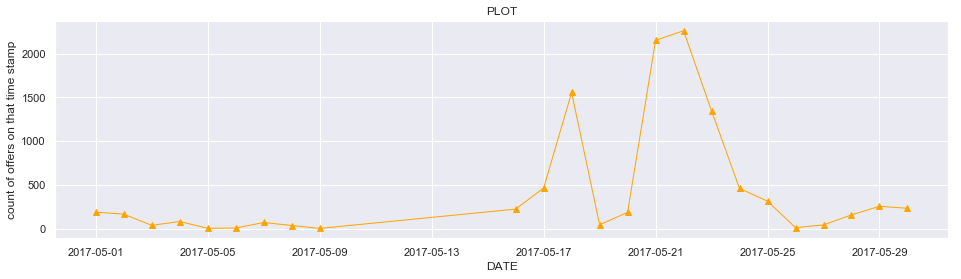

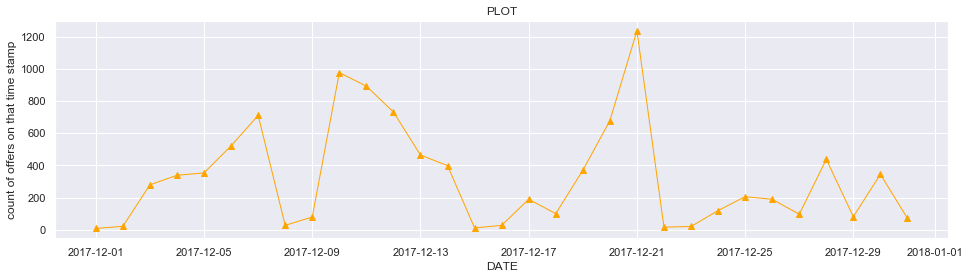

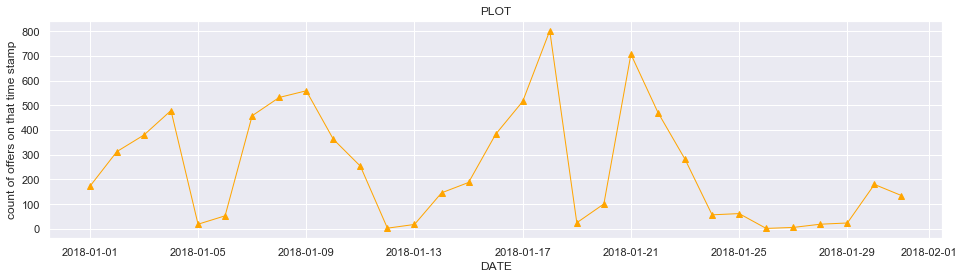

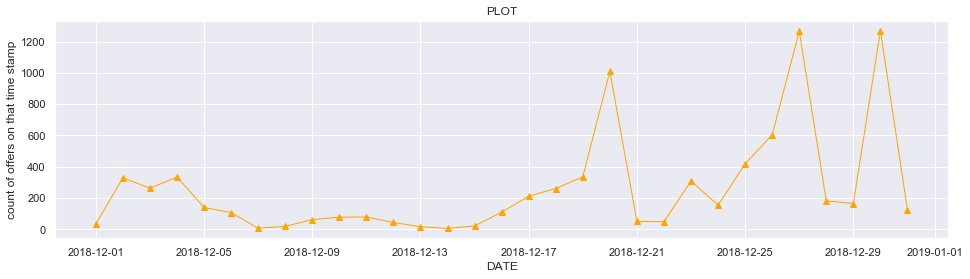

In [17]:
##zooming in:---

for index_date in ['2017-01','2017-05','2017-12','2018-01','2018-12']:
    sub_data = gp_count[index_date]
    plt.figure(figsize = (16,4))
    plt.plot(sub_data.index,sub_data['date'],marker = '^',linewidth = 1,color = 'orange',label = 'no of offers')
    plt.xlabel("DATE")
    plt.ylabel("count of offers on that time stamp")
    plt.title("PLOT")
    plt.show()

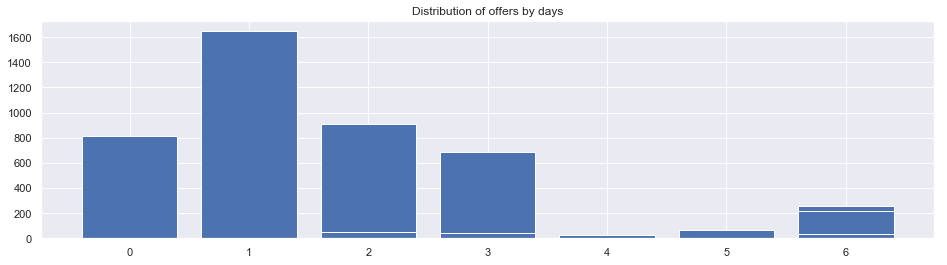

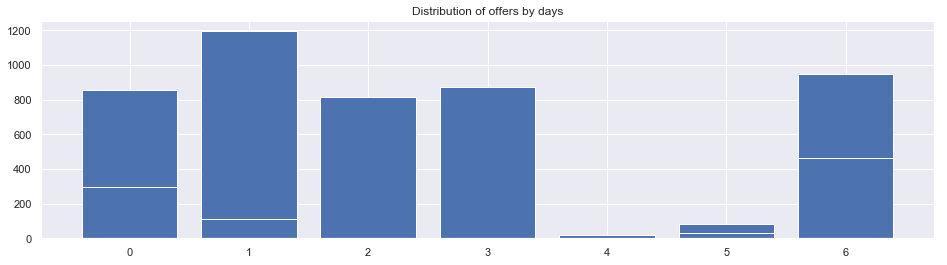

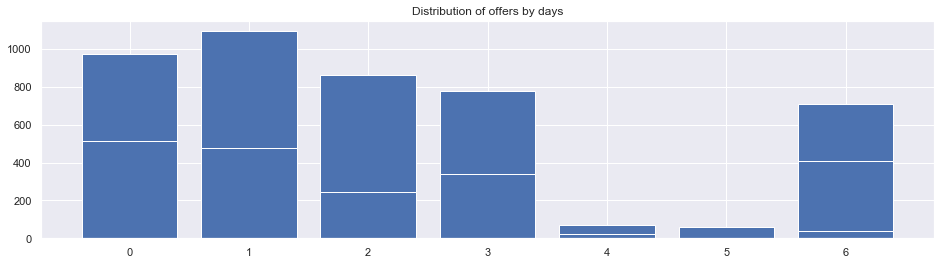

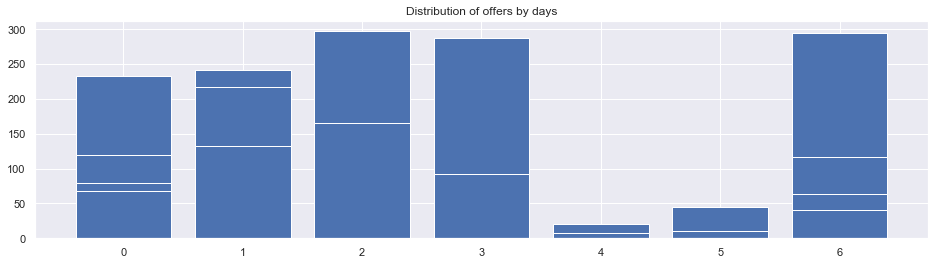

In [23]:
gp_count['weekday'] = [i.weekday() for i in gp_count.index]
##simulation
for i in ['2017-01','2017-09','2018-9','2019-01']:
    plt.figure(figsize = (16,4))
    sub_date = gp_count[i]
    plt.bar(sub_date['weekday'],sub_date['date'])
    plt.title("Distribution of offers by days")

##Day-4 is Friday:--
##On friday less offers were given...

Text(0.5, 1.0, 'PLOT')

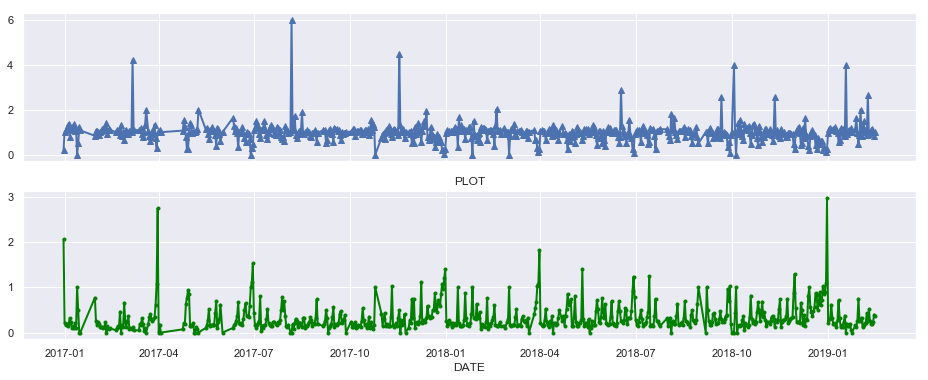

In [19]:
##Plotting mean distribution
fig,axes = plt.subplots(nrows = 2,ncols = 1,sharex = True,sharey = False,figsize = (16,6))
axes[0].plot(gp_mean.index,gp_mean['no_of_oprtnty_creatd'],marker = '^',linewidth = 2,label = 'no_of_oprtnty_created')
axes[1].plot(gp_mean.index,gp_mean['no_of_wins'],marker = '.',linewidth = 2,label = 'no_of_wins',color = 'green')
plt.xlabel("DATE")
plt.title("PLOT")

##One thing is clear from the plot is there are some spikes which might be tyyhe holidays or some special days
## so more offers were given ...(BLUE plot)

# EDA-2

In [20]:
data.head(7)

,date_key,offrng_id,geo_id,no_of_oprtnty_creatd,no_of_wins,date
date,,,,,,
2017-06-15,42901,194,15,1,1,2017-06-15
2017-06-15,42901,194,46,1,0,2017-06-15
2017-06-15,42901,194,224,0,1,2017-06-15
2017-06-15,42901,194,46,1,0,2017-06-15
2017-06-15,42901,194,224,0,1,2017-06-15
2017-06-15,42901,194,71,1,0,2017-06-15
2017-06-15,42901,194,166,1,0,2017-06-15


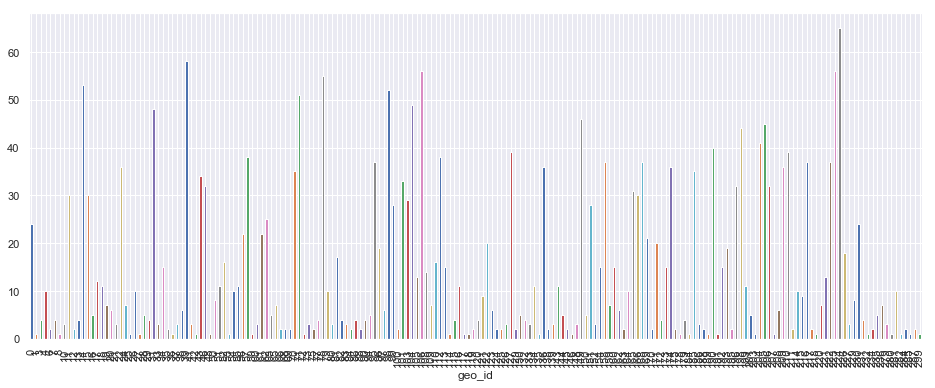

In [21]:
##no of unique offrng id per geo_locations:--
num_offers = data.groupby('geo_id')['offrng_id'].nunique()
#print(num_offers)
num_offers.plot(kind = 'bar',figsize = (16,6))

# FEATURE ENGINEERING